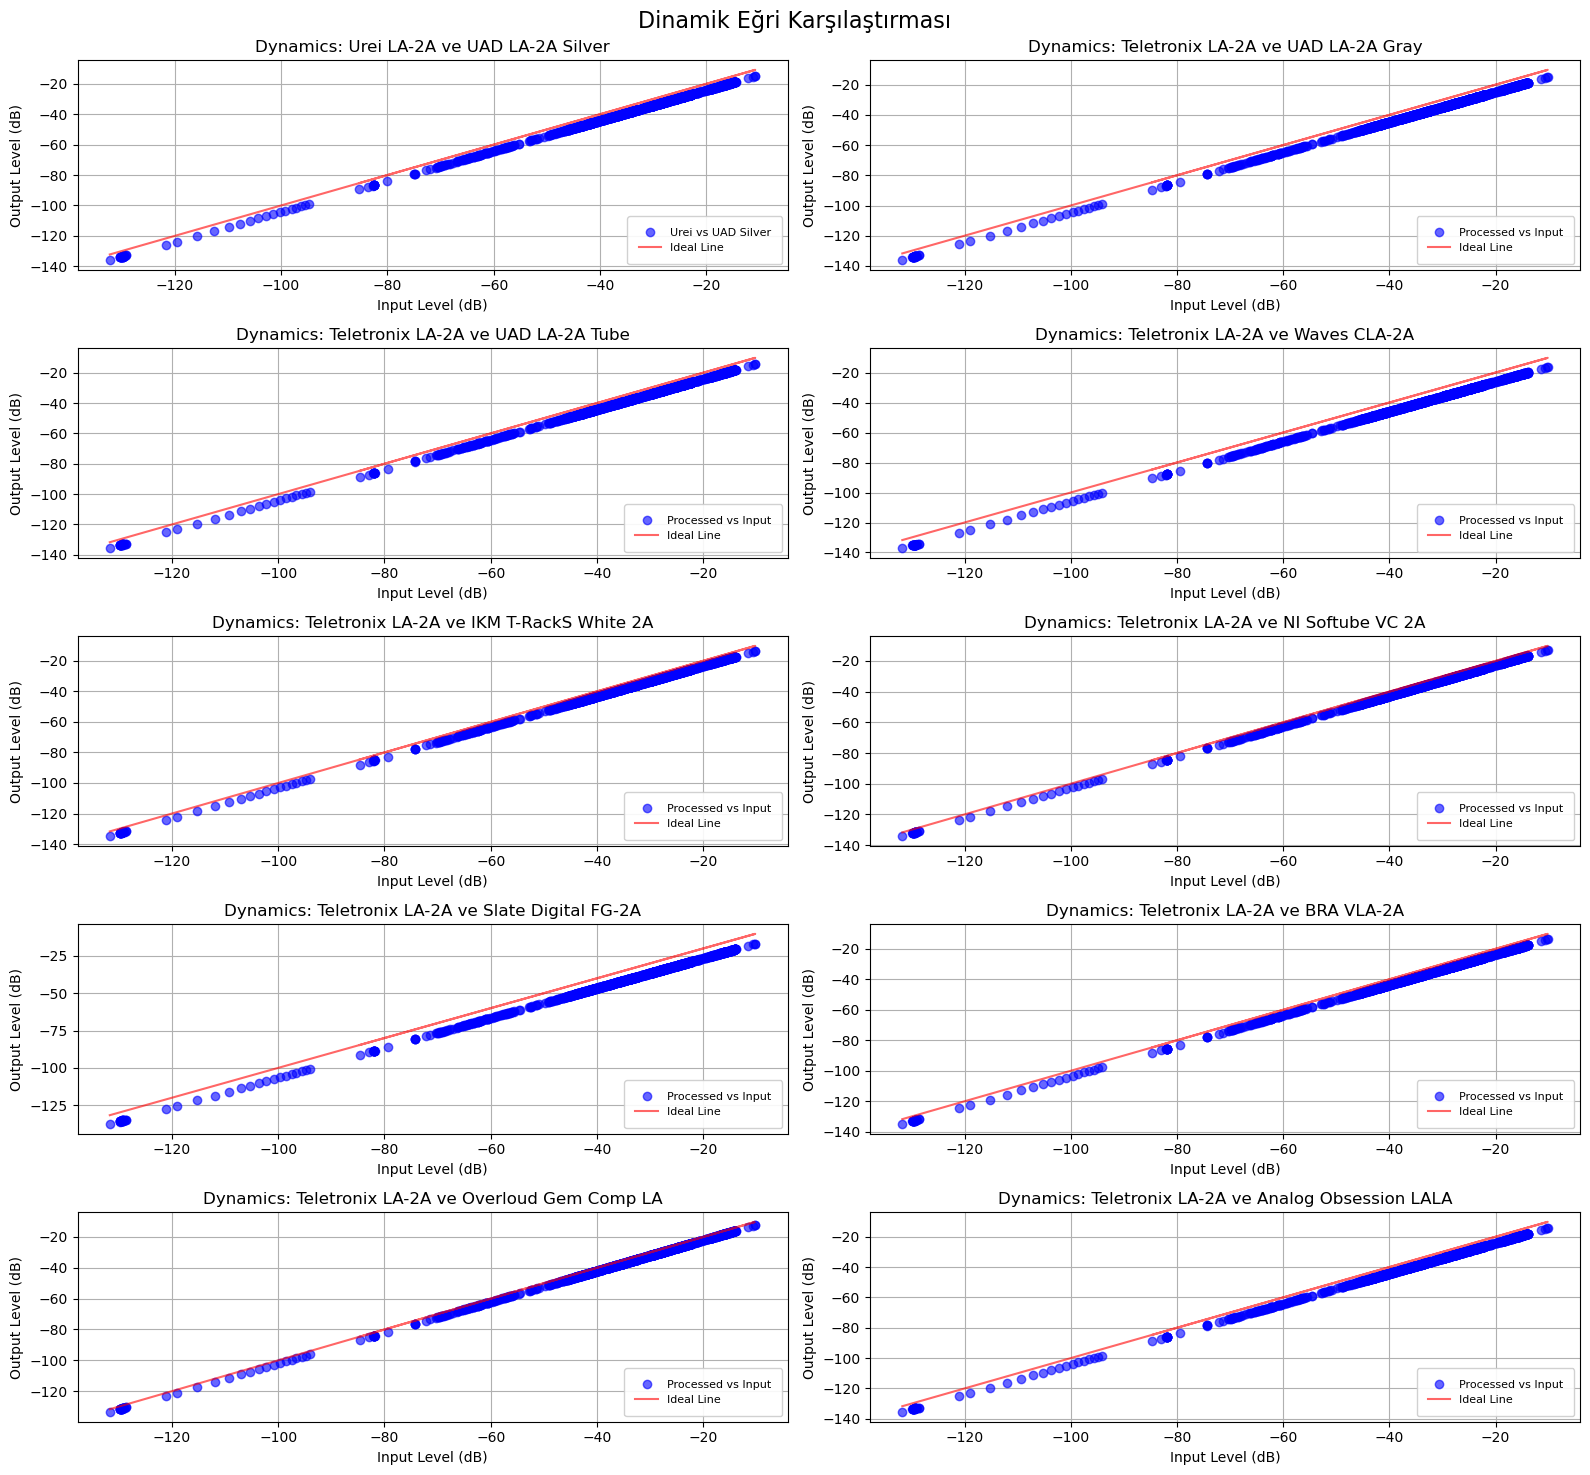

In [13]:
# Librosa sisteminin aktarılması

import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.
from scipy import signal # Python'daki SciPy kütüphanesinin signal modülünü içe aktarmaya yarar.

# Ses dosyalarının yollarını bir listeye ekleme
audio_files = [
    "/Users/nazimerensahin/Desktop/fldr/teletronix.wav", 
    "/Users/nazimerensahin/Desktop/fldr/urei.wav",     
    "/Users/nazimerensahin/Desktop/fldr/gray.wav",
    "/Users/nazimerensahin/Desktop/fldr/silver.wav",
    "/Users/nazimerensahin/Desktop/fldr/tube.wav",
    "/Users/nazimerensahin/Desktop/fldr/cla_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/white_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/vc_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/fg_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/vla_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/comp_la.wav",
    "/Users/nazimerensahin/Desktop/fldr/lala.wav",
]

# Her dosya için açıklayıcı isimler ekleme
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# Teletronix Input'u referans olarak yükleme
ref_file = audio_files[0]
ref_label = audio_labels[0]
ref_sound, ref_sr = librosa.load(ref_file, sr=None)

# Urei ve UAD Silver dosyalarını yükleme
urei_file = audio_files[1]
urei_label = audio_labels[1]
urei_sound, urei_sr = librosa.load(urei_file, sr=None)

silver_file = audio_files[3]
silver_label = audio_labels[3]
silver_sound, silver_sr = librosa.load(silver_file, sr=None)

# RMS hesaplama ve dB dönüşümü fonksiyonu
def compute_rms_db(signal, frame_size, hop_length):
    rms = librosa.feature.rms(y=signal, frame_length=frame_size, hop_length=hop_length)[0]
    db = 20 * np.log10(rms + 1e-9)  # Sıfır bölme hatasını engellemek için küçük bir değer eklenir
    return db

# Parametreler
frame_size = 2048
hop_length = 512

# Referans dosya için RMS dB hesaplama
ref_db = compute_rms_db(ref_sound, frame_size, hop_length)

# Urei ve UAD Silver dosyaları için RMS dB hesaplama
urei_db = compute_rms_db(urei_sound, frame_size, hop_length)
silver_db = compute_rms_db(silver_sound, frame_size, hop_length)

# Grafik düzeni için sütun ve satır sayısı
n_graphs = 10  # Toplam grafik sayısı
n_cols = 2  # Sütun sayısı
n_rows = (n_graphs + 1) // n_cols  # Satır sayısını belirler

# Grafik figürü oluşturma
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

# Urei ile UAD Silver karşılaştırması (ilk grafik)
axes[0].plot(urei_db, silver_db, 'o', color='blue', alpha=0.6, label="Urei vs UAD Silver")
axes[0].plot(urei_db, urei_db, '-', color='red', alpha=0.6, label="Ideal Line")  # İdeal 1:1 çizgisi
axes[0].set_title(f"Dynamics: {urei_label} ve {silver_label}")
axes[0].set_xlabel("Input Level (dB)")
axes[0].set_ylabel("Output Level (dB)")
axes[0].legend(fontsize=8, loc="lower right", frameon=True, framealpha=0.9, borderpad=1)
axes[0].grid(True)

# Teletronix ile diğer dosyaların karşılaştırılması (kalan grafikler)
plot_idx = 1  # İlk grafik Urei-Silver karşılaştırması olduğu için 1'den başlar
for idx, (file, label) in enumerate(zip(audio_files[2:], audio_labels[2:]), start=2):
    if label == silver_label:  # Teletronix ile UAD Silver karşılaştırmasını atla
        continue

    # Ses dosyasını yükle
    sound, sr = librosa.load(file, sr=None)
    sound_db = compute_rms_db(sound, frame_size, hop_length)

    # Grafik çizimi
    ax = axes[plot_idx]
    ax.plot(ref_db, sound_db, 'o', color='blue', alpha=0.6, label="Processed vs Input")
    ax.plot(ref_db, ref_db, '-', color='red', alpha=0.6, label="Ideal Line")  # İdeal 1:1 çizgisi
    ax.set_title(f"Dynamics: {ref_label} ve {label}")
    ax.set_xlabel("Input Level (dB)")
    ax.set_ylabel("Output Level (dB)")
    ax.legend(fontsize=8, loc="lower right", frameon=True, framealpha=0.9, borderpad=1)
    ax.grid(True)

    # Grafik sayacını artır
    plot_idx += 1

# Boş kalan alt eksenleri gizleme
for idx in range(plot_idx, len(axes)):
    fig.delaxes(axes[idx])

# Genel düzenleme ve gösterim
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Dinamik Eğri Karşılaştırması", fontsize=16)
plt.show()
